# Agent Q-learning

In [0]:
import random

class agent_q_learning:
  def __init__(self, env):
    self.action_size      = env.action_space()      # Nombre d'action possible
    self.observation_size = env.observation_space() # Nombre d'états possibles
    self.q  = {(s,a) : 0 for s in range(self.observation_size) for a in range(self.action_size)} # Les q-valeurs
    self.epsilon = 1 # paramètre espilon
    self.alpha   = 1 # paramètre alpha
    self.gamma   = 1 # paramètre gamma

  def reset(self):
    self.alpha   = max(0.01,   self.alpha*0.995)
    self.epsilon = max(0.01, self.epsilon*0.995)
    return 
        
  def play(self, s):
    if (random.random() < self.epsilon):
      return random.choice(range(self.action_size))
    Q_max = -100000
    for i in range(self.action_size):
      if( self.q[(s,i)] > Q_max ):
        Q_max = self.q[(s,i)]
    indice_max = []
    for i in range(self.action_size):
      if( self.q[(s,i)] == Q_max ):
        indice_max.append(i)
    return random.choice(indice_max)
        
  def train(self,state,action,reward, next_state, done):
    next_Q_max = -100000
    for i in range(self.action_size):
      if( self.q[(next_state,i)] > next_Q_max ):
        next_Q_max = self.q[(next_state,i)]
    self.q[(state,action)] += self.alpha * (reward + self.gamma*next_Q_max - self.q[(state,action)])
    return

# Test code

In [0]:
import matplotlib.pyplot as plt

average = 100
def run(env,agent,episodes,render=True, tracer=False):
  Y1 = []
  Y2 = []
  for i_episode in range(episodes):
    agent.reset()
    state = env.reset()
    R = 0
    for t in range(500+1):
      if render:
        env.render()
      action = agent.play(state)
      next_state, reward, done, info = env.step(action)
      agent.train(state, action, reward, next_state, done)
      state = next_state
      R += reward
      if done:
        Y1 += [R]
        tmp = min(average,i_episode+1)
        moy = sum([Y1[-j] for j in range(1,tmp)])/tmp
        Y2 += [moy]
        #print("Ep {} / Ts {} / Rw {} / My {}".format(i_episode,t+1,R,moy))
        break
  if tracer:
    plt.plot(range(len(Y1)), Y1, 'b+')
    plt.plot(range(len(Y2)), Y2, 'r-')
    plt.show()
    plt.close()
    print (sum([Y1[-j] for j in range(1,average+1)])/(average))
  env.close()

#Environment

In [0]:
class CartPoleEnv:

  def __init__(self, org):
    self.env = gym.make(org)

  def action_space(self):
    return 2

  def observation_space(self):
    return 18+1

  def reset(self):
    return self.box2int(self.env.reset())

  def step(self, action):
    next_state, reward, done, info = self.env.step(action)
    
    return self.box2int(next_state), reward, done, info

  def render(self):
    return self.env.render()

  def close(self):
    return self.env.close()
  
  def box2int(self,state_box):
    pos   = state_box[0]
    pos_v = state_box[1]
    ang   = state_box[2]
    ang_v = state_box[3]
    res   = 0
    if pos < -2.4 or pos > 2.4 or ang < -0.2094384 or ang > 0.2094384:
      return 18
    if   ang < -0.1047192   : res += 0
    elif ang < -0.0174532   : res += 3
    elif ang < 0 		        : res += 6
    elif ang < 0.0174532  	: res += 9
    elif ang < 0.1047192    : res += 12
    else	    			        : res += 15
    if   ang_v < -0.87266       : res += 0
    elif ang_v < 0.87266        : res += 1
    else                        : res += 2
    return res

# Run

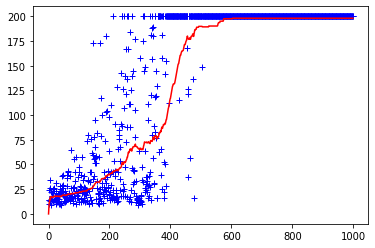

200.0


In [11]:
import gym

env = CartPoleEnv('CartPole-v0')
agent = agent_q_learning(env)
run(env, agent,1000, False, True)

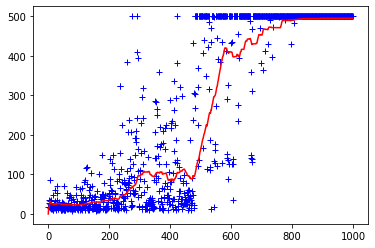

500.0


In [15]:
env = CartPoleEnv('CartPole-v1')
agent = agent_q_learning(env)
run(env, agent,1000, False, True)